**Project Planning Report - Ashlee Zhu, 46** 
-


**Data Description** 
- 


The `players.csv` dataset is collected through a Minecraft server created by a UBC computer science research group who are investigating player behaviour in video games to create an AI that is able to interact with players in a virtual gaming environment.

The `players.csv` dataset is a comma separated file, containing 7 variables and 196 observations, with each row representing a different player.  

**7 Variables - Type and Meaning** 

- `experience` (character type): Player skill level.
- `subscribe` (logical type): Whether or not the player is subscribed to the game's newsletter. 
- `hashedEmail` (character type): Unique email identifier of each player. 
- `played_hours` (numeric type): The number of hours played when data was collected. 
- `name` (character type): The name of each player. 
- `gender` (character type): The gender of each player. 
- `Age` (numeric type): The age of each player.

**Summary Statistics**

Based on the `players.csv` dataset, the average hours played is 5.85 and the average age of players is 21.

**Issues in `players.csv` dataset**

The `players.csv` dataset contains a few issues that must be considered before data wrangling:

- The `subscribe` variable is of logical type, thus it must be changed to factor type before undergoing k-nn classification.
- The `Age` variable contains missing data (two NA values), thus R must ignore the missing data.
- The dataset is not tidy. The variable `Age` starts capitalized, whereas all other variables starts lowercased. The variable `played_hours` is separated by an underscore `_` , whereas the variable `hashedEmail` is not.


In [4]:
library(tidyverse)

In [5]:
#Loading dataset into R.
players <- read_csv("players.csv")
players 

#Calculating summary statistics of average played_hours and average Age.
sum_mean <- players |>
    select(played_hours, Age) |>
    map_dfr(mean, na.rm = TRUE)
sum_mean


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


**Question** 
-

**Broad Question**

Using the `players.csv` dataset, an investigation is conducted on predictions about subscribing to game-related newsletter through player characteristics and the differences between players.

**Specific Question**

Can the age of players predict whether or not they will subscribe to game-related newsletter based on the `players.csv` dataset? 

This data can help address this question by finding the target audience of gamers who will subscribe to game-related newsletter through their ages. 


**Exploratory Data Analysis and Visualization** 
- 

**Mean Values** 

 Mean value of quantitative variables in the `players.csv` dataset.

| Hours Played | Age |
|--------------|-----|
| 5.85         |  21 |

**Exploratory Visualizations**

The histogram plots show that `age` may be the best predictor for predicting whether or not players will subscribe to game-related newsletter.

*Experience vs. Subscribers Plot*

The `experience` variable contains 5 different categories, which may not be enough data to accurately predict whether or not a player will subscribe to the newsletters.

*Age vs. Subscribers Plot* 

The `age` variable contains a good amount of data to allow for proper predictions of whether or not a player will subscribe to the newsletter. 

*Play time vs. Subscribers Plot*

The `played_hours` variable contains too many categories in its data which could cause the k-nn classification algorithm to slow down when making the prediction. 

*Gender vs. Subscribers Plot*

The `gender` variable contains only 7 categories, which may not be enough data to make accurate predictions about new observations. 


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


played_hours,age
<dbl>,<dbl>
5.845918,21.13918


Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


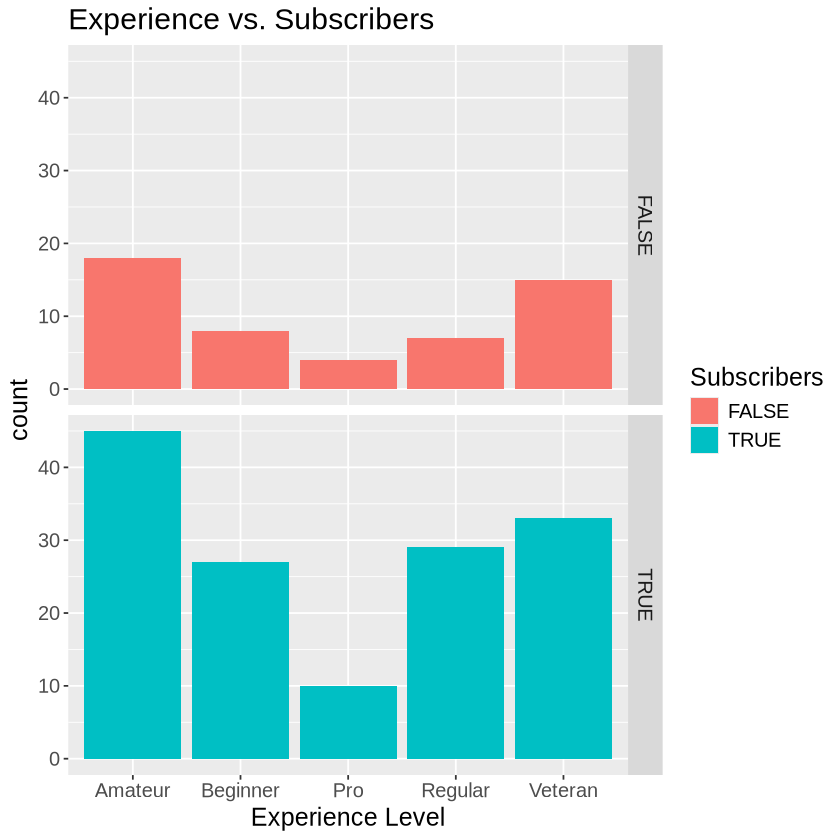

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


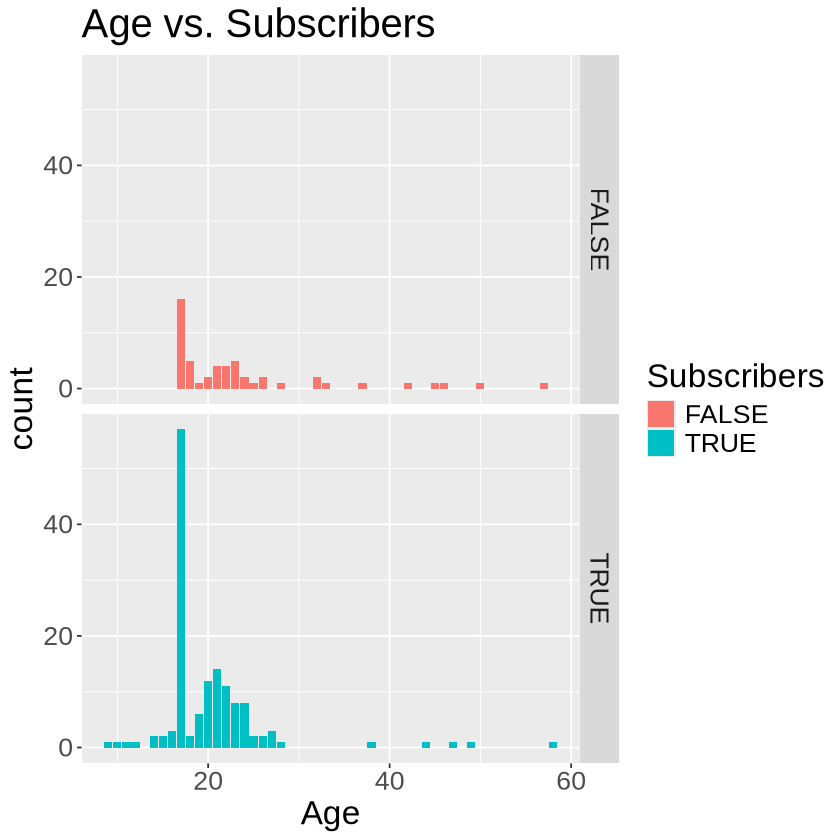

Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


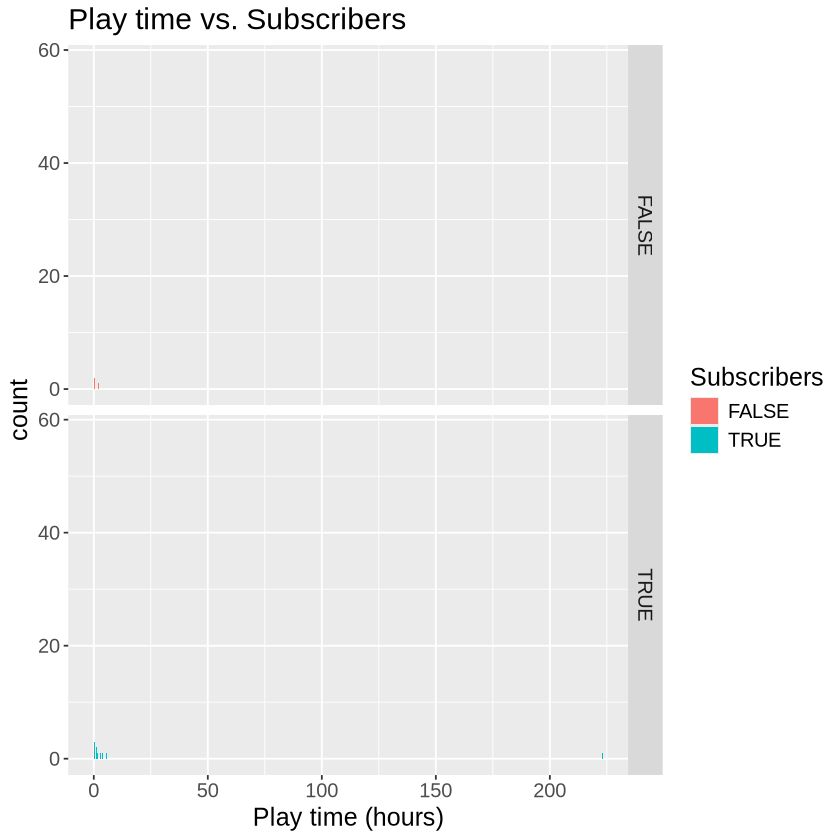

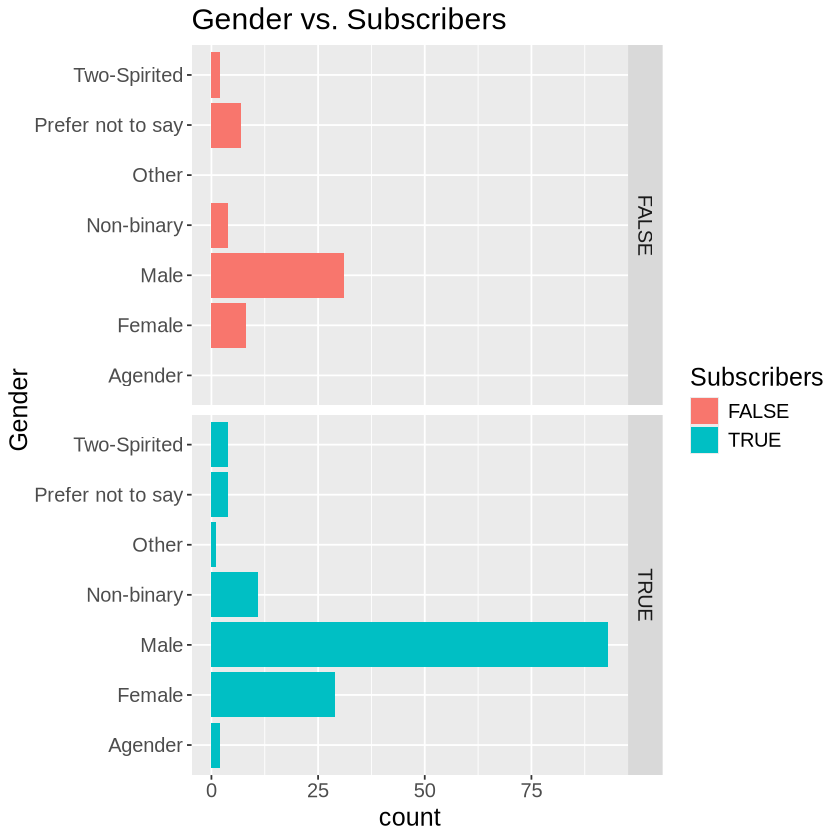

In [6]:
#Changing the subscribe variable from logical type to factor type. 
players <- players |>
    mutate(subscribe = as_factor(subscribe))
players

#Renaming the dataset variable titles (tidying). 
players_tidy <- rename(players, 
                       hashed_email = hashedEmail, 
                       age = Age)
players_tidy

#Mean value for each quantitative variable (played_hours and age).
players_mean <- players_tidy |>
    select(played_hours, age) |>
    map_dfr(mean, na.rm = TRUE)
players_mean 

#Exploratory plots (response variable: subscribe). Which are the best explanatory variable(s)?
exp_plot <- ggplot(players_tidy, aes(x = experience, fill = as_factor(subscribe))) + 
    geom_histogram(stat = "count") + 
    facet_grid(rows = vars(subscribe)) +
    labs(x = "Experience Level", fill = "Subscribers") +
    ggtitle("Experience vs. Subscribers") +
    theme(text = element_text(size = 15))
exp_plot

age_plot <- ggplot(players_tidy, aes(x = age, fill = as_factor(subscribe))) + 
    geom_histogram(stat = "count") + 
    facet_grid(rows = vars(subscribe)) +
    labs(x = "Age", fill = "Subscribers") +
    ggtitle("Age vs. Subscribers") +
    theme(text = element_text(size = 20))
age_plot

played_hours_plot <- ggplot(players_tidy, aes(x = played_hours, fill = as_factor(subscribe))) + 
    geom_histogram(stat = "count") + 
    facet_grid(rows = vars(subscribe)) +
    labs(x = "Play time (hours)", fill = "Subscribers") +
    ggtitle("Play time vs. Subscribers") +
    theme(text = element_text(size = 15))
played_hours_plot

gender_plot <- ggplot(players_tidy, aes(y = gender, fill = as_factor(subscribe))) + 
    geom_histogram(stat = "count") + 
    facet_grid(rows = vars(subscribe)) +
    labs(y = "Gender", fill = "Subscribers") +
    ggtitle("Gender vs. Subscribers") +
    theme(text = element_text(size = 15))
gender_plot

**Methods and Plan** 
- 

The method chosen to address the question is the K-nearest neighbors classification algorithm. This method is appropriate because the prediction being made is categorical (subscribe), and the new observation (player) will be assigned to the categorical value based on the other variables (age) given. 

However, there are weaknesses to the k-nn classification algorithm. Thos method makes predictions based on surrounding observations, thus assumptions must be made that the algorithm does not recognize if the data has already been standardized. Therefore, the dataset must be scaled, centred, and balanced before undergoing k-nn classification for all observations to be considered equally through majority votes. Additionally, the algorithm does not perform well with a large number of predictors or a large training data as it will cause the algorithm to slow down.  

With these considerations in mind: 

The dataset will be split for training and testing, where 70% will be used to train the classifier and 30% will be used to test it. An `initial_split` will be firstly conducted to ensure each split recieves the same amount of subscribers and non-subscribers in the `subscribe` variable. Then the `training` and `testing` functions will be used to created the two datasets. 

To select the best model, the classifier must be tuned. With the training dataset, a validation set will be used to compare the classifier's performance using different K values, then choosing the best K. Multiple splits will be made to the training dataset to achieve a better accuracy of choosing the best K value. Thus, a 5 fold cross-validation will be performed. Finally, with the best K value chosen, the k-nn classification algorithm will be evaluated on the testing dataset to make its predictions.  


**GitHub Repository** 
-- 

The link for the GitHub 